# LangChain

LangChain is an open-source framework designed to help developers build applications that integrate large language models (LLMs) with external data, tools, and logic. It provides abstractions and tools to create advanced AI-powered applications such as chatbots, agents, and retrieval-augmented generation (RAG) systems.

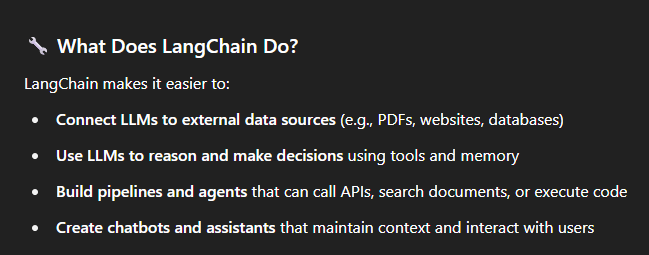

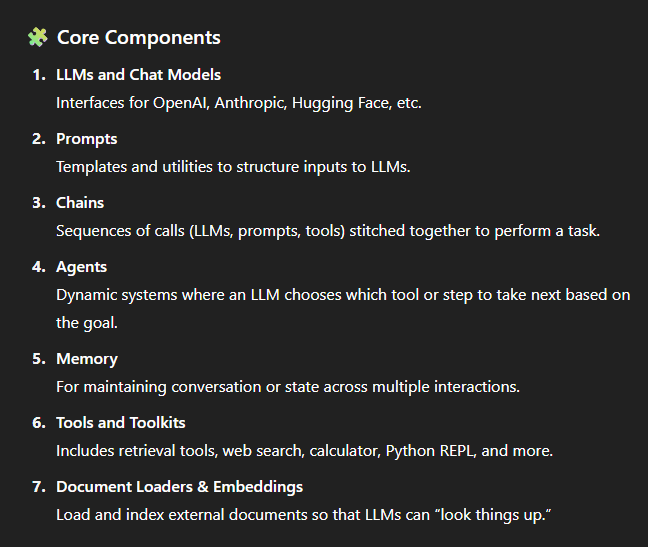

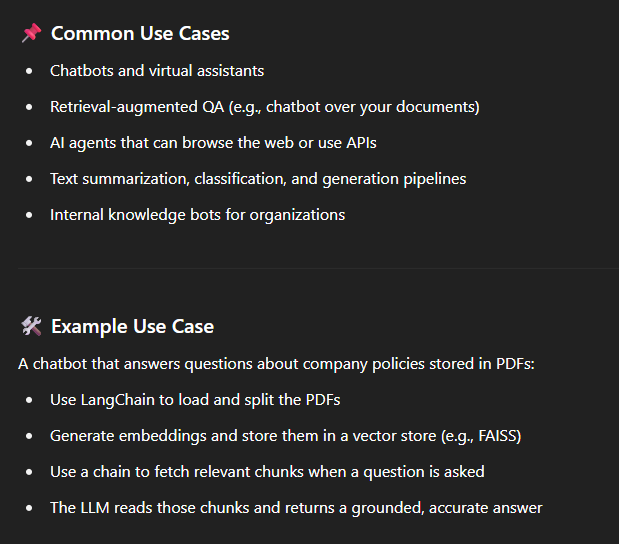

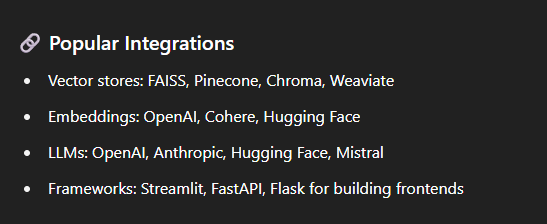

In [ ]:
# Create an environment for the api key

import os
os.environ["OPENAI_API_KEY"] = "Add API key here"

In [ ]:
# Install Langchain

!pip Install Langchain


# Install OpenAi LLM

!pip Install OpenAi

### 1. LLM

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.75)

### 2. Prompt Template

In [ ]:

from langchain.prompts import PromptTemplate

  prompt = PromptTemplate(
      input_variables=["product"],
      template="What is a good name for a company that makes {product}?",
  )


# To see the prompt

Final_Prompt = prompt.format(product="colorful socks")
print("Final Prompt :", Final_Prompt)

### 3. Chains

In [ ]:

from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt)
chain.run("colorful socks")

### 3.1. Simple Sequential Chain

A SimpleSequentialChain in LangChain is used when you want to run multiple language model (LLM) prompts one after the other, where the output of one step becomes the input of the next.

In [ ]:

from langchain.chains import SimpleSequentialChain


# Create a prompt template to suggest a name

prompt_name = promt = PromptTemplate(
    input_variables=["cusine"],
    template="What is a good name for a restaurant that makes {product} food?",
)

chain_name = LLMChain(llm=llm, prompt=prompt_name)


# Create a prompt template to suggest a List of food items

prompt_items = PromptTemplate(
    input_variables=["restaurant_name"],
    template="Suggest some food items for {restaurant_name} cusine",
)

chain_food_items = LLMChain(llm=llm, prompt=prompt_items)


# Simple Sequential Chain

simple_chain = SimpleSequentialChain(chains=[chain_name, chain_food_items])

simple_chain.run("Italian")

### 3.2. Sequential Chain

A SequentialChain is an advanced version of SimpleSequentialChain. While SimpleSequentialChain passes output from one chain to the next linearly,
SequentialChain gives you more control over:

1. Multiple input/output variables

2. Named steps

3. Reusing or combining variables between steps

In [ ]:

from langchain.chains import SequentialChain


# Create a prompt template to suggest a name

prompt_name = promt = PromptTemplate(
    input_variables=["cusine"],
    template="What is a good name for a restaurant that makes {product} food?",
)

chain_name = LLMChain(llm=llm, prompt=prompt_name, output_key = "restaurant_name")


# Create a prompt template to suggest a List of food items

prompt_items = PromptTemplate(
    input_variables=["restaurant_name"],
    template="Suggest some food items for {restaurant_name} cusine",
)

chain_food_items = LLMChain(llm=llm, prompt=prompt_items, output_key = "food_items")



# Sequential Chain

Sequential_Chain = sequentialchain(chain = [chain_name, chain_food_items

                         input_variables = ["cusine"]

                         output_variables = ["restaurant_name", "food_items"]

                         ])

Sequential_Chain({"cusine":"Italian"})

### 4. Agent

In LangChain, an Agent is a powerful component that allows language models (LLMs) to make decisions about what actions to take — dynamically and interactively.

In [ ]:
# Using Wikipedia

from langchain.agents import load_tools, initialize_agent, Agent_type

tools = load_tools(["wikipedia", "llm-math"], llm=llm)

agent = initialize_agent(tools, llm, agent=Agent_type.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

agent.run("What was the GDP of US in 2022 plus 5?")

In [ ]:
# Using SerpAPI

os.environ["SERPAPI_API_KEY"] = "Add API key here"


load_tools(["serpapi", "llm-math"], llm=llm)

agent = initialize_agent(tools, llm, agent=Agent_type.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

agent.run("What was the GDP of US in 2022?")


### 5. Memory

In LangChain, Memory refers to the ability to store and reuse information across interactions — just like how humans remember context in a conversation.

In [ ]:

# Conversation Buffer Memory

from langchain.memory import ConversationBufferMemory

CBM = ConversationBufferMemory()


# To map the memory

prompt_name = promt = PromptTemplate(
    input_variables=["cusine"],
    template="What is a good name for a restaurant that makes {product} food?",
)

chain_name = LLMChain(llm=llm, prompt=prompt_name, memory = CBF)
chain_name.run("Italian")


# To print the Memory

print(chain_name.CBM.buffer)


In [ ]:
# Conversation Chain

from langchain.chains import ConversationChain

Convo = ConversationChain(llm = llm)

print(Convo.prompt.template)


# To run it

Chat1 = Convo.run("Who won the first cricket world cup?")
print("\nChat 1 :", Chat1)

Chat2 = Convo.run("What is the name of the winner team?")
print("\nChat 2 :", Chat2)


In [ ]:

# Conversation Buffer Window Memory

from langchain.memory import ConversationBufferWindowMemory

CBWM = ConversationBufferWindowMemory(k=1)

Converstaion = ConversationChain(llm = llm, memory = CBWM)


# To run it

Chat1 = Converstaion.run("Who won the first cricket world cup?")
print("\nChat 1 :", Chat1)

Chat2 = Converstaion.run("What is 5+5?")
print("\nChat 2 :", Chat2)

Chat3 = Converstaion.run("What is the name of the winner team?")
print("\nChat 3 :", Chat3)
